In [23]:
import torch, random
from statistics import mean
from cebmf_torch import cEBMF
import matplotlib.pyplot as plt
# ---- config
NUM_RUNS   = 1
N, P       = 50, 40
NOISE_STD  =  .1
MAXIT      = 50
TOL        = 1e-9   # numerical tolerance for strictness

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_dtype(torch.float64)

def is_strictly_increasing(xs, tol=0.0001):
    # xs[t+1] > xs[t] + tol  for all t
    return all(xs[t+1] > xs[t] - tol for t in range(len(xs)-1))

def is_strictly_decreasing(xs, tol=0.001):
    # xs[t+1] < xs[t] - tol  for all t
    return all(xs[t+1] < xs[t] + tol for t in range(len(xs)-1))

def one_run(seed):
    # reproducibility
    random.seed(seed)
    torch.manual_seed(seed)

    # rank-1 signal + Gaussian noise
    u = torch.rand(N, device=device)
    v = torch.rand(P, device=device)
    Y = torch.outer(u, v) + NOISE_STD * torch.randn(N, P, device=device)

    model = cEBMF(data=Y, K=5, prior_F="point_exp",
                 prior_L="point_exp") 
    model.fit(maxit=MAXIT)

    loss_hist = model.obj                       # your stored objective = negative ELBO
    return(loss_hist)
 


results=[]

for i in range(NUM_RUNS):
    results.append( one_run(i))
 

5
2


In [24]:
import matplotlib.pyplot as plt

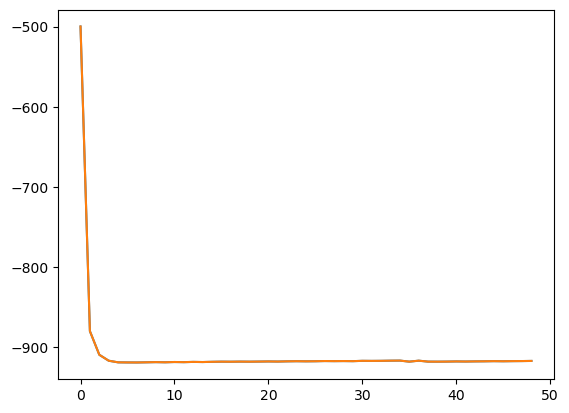

In [25]:
plt.plot(results[0])
for i in range(NUM_RUNS):
    plt.plot(results[i])

In [26]:
h=0

for i in range(NUM_RUNS):
    if (is_strictly_decreasing(results[i], tol=0.1))== False:
        h=h+1
print(h)

1


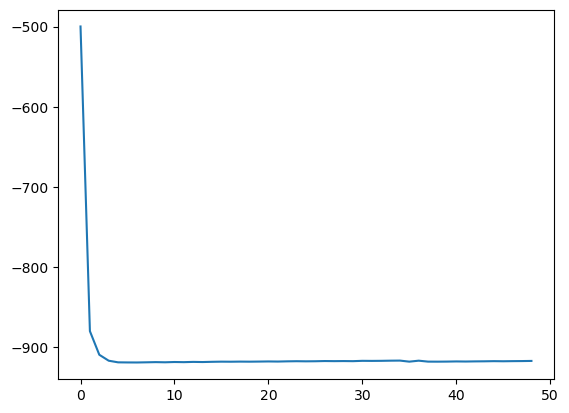

In [27]:
plt.plot(results[0])

In [31]:
seed=1
random.seed(seed)
torch.manual_seed(seed)

    # rank-1 signal + Gaussian noise
u = torch.rand(N, device=device)
v = torch.rand(P, device=device)
Y = torch.outer(u, v) + NOISE_STD * torch.randn(N, P, device=device)

model = cEBMF(data=Y, K=5, prior_F="point_exp",
                 prior_L="point_exp") 
model.fit(maxit=50)

5


CEBMFResult(L=tensor([[1.0887e-03],
        [4.5571e+00],
        [1.8510e-02],
        [3.7329e+00],
        [6.6154e+00],
        [2.5004e-01],
        [1.8621e-01],
        [1.3194e+01],
        [5.1966e+00],
        [9.9191e+00],
        [8.6404e+00],
        [6.1802e+00],
        [1.0954e+01],
        [5.3487e+00],
        [1.4300e-02],
        [1.2538e-01],
        [1.1675e+01],
        [4.0055e+00],
        [6.2227e-02],
        [1.0297e+01],
        [1.1735e+01],
        [1.4433e+01],
        [1.5946e+01],
        [1.8013e+01],
        [9.6855e+00],
        [1.9322e-03],
        [7.7829e-02],
        [2.2576e+01],
        [1.2547e+01],
        [5.6161e+00],
        [6.5380e+00],
        [1.4108e-02],
        [1.9264e+01],
        [2.0577e+01],
        [2.1872e+01],
        [6.5532e-02],
        [2.0177e+01],
        [5.4939e-02],
        [4.9044e-01],
        [5.1748e+00],
        [2.0965e+00],
        [2.8786e+00],
        [5.5900e+00],
        [6.8711e+00],
        [5.7377e+0

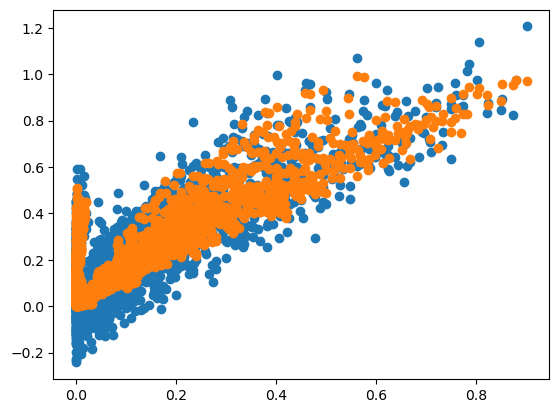

In [32]:
model.update_fitted_value()
plt.scatter(model.Y_fit, Y)
plt.scatter(model.Y_fit, torch.outer(u, v) )

In [33]:
model.obj

[673.9525120362416,
 -271.06173330329676,
 -746.1117708823933,
 -791.127784091534,
 -795.9452563848154,
 -796.2781997722241,
 -796.1644191272335,
 -796.0019705792276,
 -795.9405264613704,
 -795.885238691767,
 -795.6922099268137,
 -795.5262543737375,
 -795.435081104974,
 -795.3780800394562,
 -795.2993237117937,
 -795.2025008881271,
 -795.1201225337718,
 -795.4791053221943,
 -794.9485432767974,
 -794.8322526982597,
 -794.7423282183964,
 -795.1963347802159,
 -794.556100320824,
 -794.9522643108598,
 -794.5124157846406,
 -794.8149309191667,
 -794.7786935093759,
 -794.2624458262512,
 -794.6416919788813,
 -794.5699710346394,
 -794.5085793997412,
 -794.4457548497548,
 -794.3741790067917,
 -794.3179056811553,
 -794.2655319019618,
 -794.2102122570445,
 -794.0702431485065,
 -792.3269688258082,
 -792.1678315003155,
 -792.1561825511706,
 -792.1555820240267,
 -792.1552862315237,
 -792.1552765615996,
 -792.1555840367619,
 -792.1555285463907,
 -792.1555745672297,
 -792.1555875647093,
 -792.15565769259